# Housing Project - Flip Robo

# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

# Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# Technical Requirements:

Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_csv(r'C:\Users\Asus\Desktop\dataset\Project-Housing_splitted\train.csv')
df_test = pd.read_csv(r'C:\Users\Asus\Desktop\dataset\Project-Housing_splitted\test.csv')

In [5]:
#checking first 10 data
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
8         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  
5     11   2006       New        Partial     219210  
6      5   2010        WD         Normal     121500  
7      1   2006        WD         Normal     155000  
8      4   2007        WD         Normal     140000  
9     10   2008       COD        Abnorml     118500  

[10 rows x 81 columns]

In [6]:
#test data first 10 data
df_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   
5   650         180       RM         21.0     1936   Pave   NaN      Reg   
6  1453         180       RM         35.0     3675   Pave   NaN      Reg   
7   152          20       RL        107.0    13891   Pave   NaN      Reg   
8   427          80       RL          NaN    12800   Pave   NaN      Reg   
9   776         120       RM         32.0     4500   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN    NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN    NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
6         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Low    AllPub  ...         396        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  
5       0     12    2007        WD         Normal  
6       0      5    2006        WD         Normal  
7       0      1    2008       New        Partial  
8       0      8    2009        WD         Normal  
9       0      6    2009        WD         Normal  

[10 rows x 80 columns]

In [7]:
#checking last 10 data
df_train.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1158   673          20       RL          NaN    11250   Pave   NaN      IR1   
1159   943          90       RL         42.0     7711   Pave   NaN      IR1   
1160   551         120       RL         53.0     4043   Pave   NaN      Reg   
1161  1301          60       RL          NaN    10762   Pave   NaN      IR1   
1162  1381          30       RL         45.0     8212   Pave  Grvl      Reg   
1163   289          20       RL          NaN     9819   Pave   NaN      IR1   
1164   554          20       RL         67.0     8777   Pave   NaN      Reg   
1165   196         160       RL         24.0     2280   Pave   NaN      Reg   
1166    31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167   617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1158         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1159         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1160         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1161         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1162         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1158      6   2006        WD         Normal     165000  
1159      8   2007       Oth        Abnorml     150000  
1160     10   2008       COD        Abnorml     140000  
1161      5   2009        WD         Normal     225000  
1162      6   2010        WD         Normal      58500  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[10 rows x 81 columns]

In [8]:
df_test.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
282   340          20       RL         66.0    12400   Pave   NaN      IR1   
283  1116          20       RL         93.0    12085   Pave   NaN      Reg   
284   358         120       RM         44.0     4224   Pave   NaN      Reg   
285    72          20       RL         69.0     7599   Pave   NaN      Reg   
286    56          20       RL        100.0    10175   Pave   NaN      IR1   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
282         Lvl    AllPub  ...         234        0    NaN    NaN         NaN   
283         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
284         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
285         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
286         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
287         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN    NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
282       0      6    2009        WD         Normal  
283       0     11    2007       New        Partial  
284       0      8    2007        WD         Normal  
285       0      6    2007        WD         Normal  
286       0      7    2008        WD         Normal  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[10 rows x 80 columns]

In [9]:
df_train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
376   642          60       FV          NaN     7050   Pave   NaN      Reg   
678   734          20       RL         80.0    10000   Pave   NaN      Reg   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
371   566          70       RL         66.0     6858   Pave   NaN      Reg   
607  1348          20       RL         93.0    15306   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
376         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
678         Lvl    AllPub  ...        0    NaN   GdWo        Shed     400   
3           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
371         Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
607         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
376      5   2007        WD         Normal     226000  
678      3   2009        WD         Normal     131400  
3        1   2010       COD         Normal     190000  
371      5   2010        WD         Normal     128000  
607      5   2007       New        Partial     283463  

[5 rows x 81 columns]

In [10]:
df_test.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
271    45          20       RL         70.0     7945   Pave   NaN      Reg   
92    290          70       RL         60.0     8730   Pave   NaN      Reg   
190  1030         160       RM         21.0     1680   Pave   NaN      Reg   
121   512         120       RL         40.0     6792   Pave   NaN      IR1   
277  1293          70       RM         60.0     6600   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
271         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
92          Lvl    AllPub  ...         259        0    NaN   NaN         NaN   
190         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
121         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
277         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
271       0      5    2006        WD         Normal  
92        0      7    2007        WD         Normal  
190       0      5    2006        WD         Normal  
121       0      3    2006       New        Partial  
277       0     12    2009        WD         Normal  

[5 rows x 80 columns]

In [11]:
#checking the type of data
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [12]:
#checking no of rows and columns 

df_train.shape

(1168, 81)

In [13]:
df_test.shape

(292, 80)

In [14]:
#checking no of columns 

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
#checking the info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [18]:
#checking statastical data

df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [19]:
df_test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

In [20]:
df_train=pd.DataFrame(data=df_train)
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [21]:
df_test=pd.DataFrame(data=df_test)
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [22]:
#checking null values
df_train.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False         True    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False         True    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1163  False       False     False         True    False   False   True   
1164  False       False     False        False    False   False   True   
1165  False       False     False        False    False   False   True   
1166  False       False     False        False    False   False  False   
1167  False       False     False         True    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False  ...     False    True   True   
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True  False   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1163     False        False      False  ...     False    True  False   
1164     False        False      False  ...     False    True  False   
1165     False        False      False  ...     False    True   True   
1166     False        False      False  ...     False    True  False   
1167     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            True    False   False   False     False          False      False  
1            True    False   False   False     False          False      False  
2            True    False   False   False     False          False      False  
3            True    False   False   False     False          False      False  
4            True    False   False   False     False          False      False  
...           ...      ...     ...     ...       ...            ...        ...  
1163         True    False   False   False     False          False      False  
1164         True    False   False   False     False          False      False  
1165         True    False   False   False     False          False      False  
1166         True    False   False   False     False          False      False  
1167         True    False   False   False     False          False      False  

[1168 rows x 81 columns]

In [23]:
df_test.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0    False       False     False        False    False   False   True   
1    False       False     False         True    False   False   True   
2    False       False     False         True    False   False   True   
3    False       False     False        False    False   False   True   
4    False       False     False        False    False   False   True   
..     ...         ...       ...          ...      ...     ...    ...   
287  False       False     False        False    False   False   True   
288  False       False     False        False    False   False   True   
289  False       False     False         True    False   False   True   
290  False       False     False        False    False   False   True   
291  False       False     False        False    False   False   True   

     LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0       False        False      False  ...        False     False    True   
1       False        False      False  ...        False     False    True   
2       False        False      False  ...        False     False    True   
3       False        False      False  ...        False     False    True   
4       False        False      False  ...        False     False    True   
..        ...          ...        ...  ...          ...       ...     ...   
287     False        False      False  ...        False     False    True   
288     False        False      False  ...        False     False    True   
289     False        False      False  ...        False     False    True   
290     False        False      False  ...        False     False    True   
291     False        False      False  ...        False     False    True   

     Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0     True         True    False   False   False     False          False  
1     True         True    False   False   False     False          False  
2     True         True    False   False   False     False          False  
3     True         True    False   False   False     False          False  
4     True         True    False   False   False     False          False  
..     ...          ...      ...     ...     ...       ...            ...  
287   True         True    False   False   False     False          False  
288   True         True    False   False   False     False          False  
289   True        False    False   False   False     False          False  
290   True         True    False   False   False     False          False  
291   True         True    False   False   False     False          False  

[292 rows x 80 columns]

In [24]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

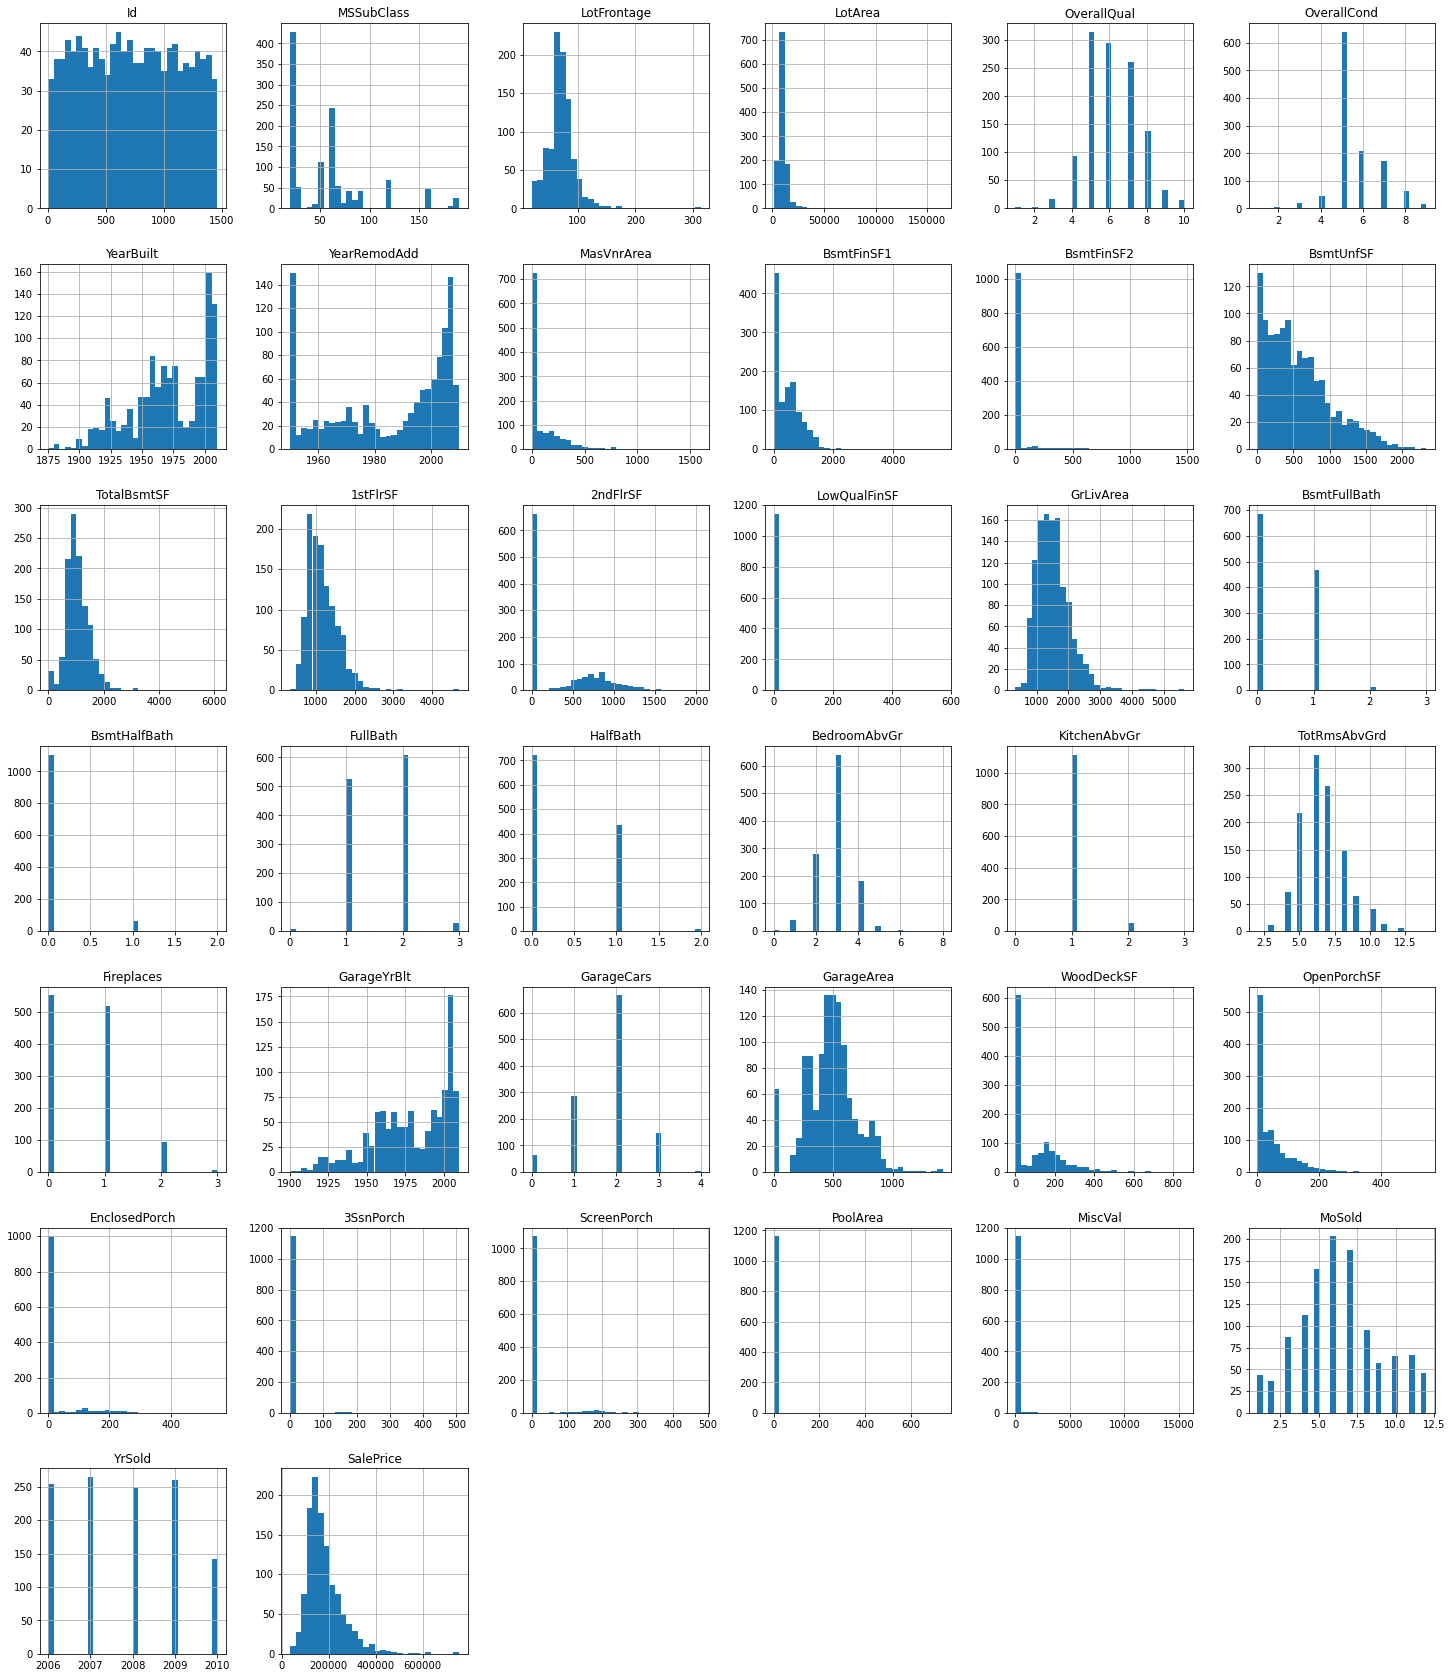

In [26]:
#viewing the data

df_train .hist(figsize=(25, 30), bins=30);

In [27]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


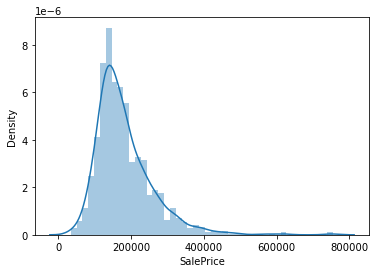

In [28]:
sns.distplot(df_train['SalePrice']);

In [29]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.953878
Kurtosis: 7.390657


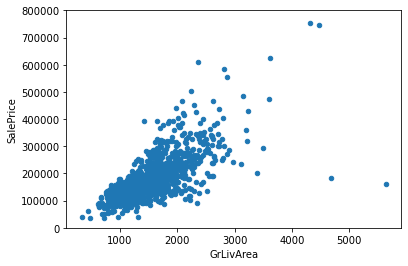

In [30]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

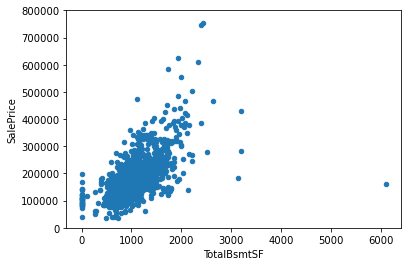

In [31]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

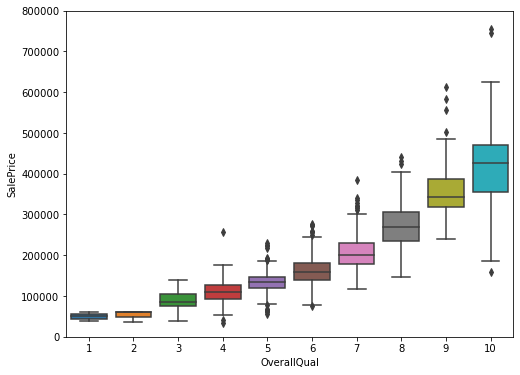

In [32]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

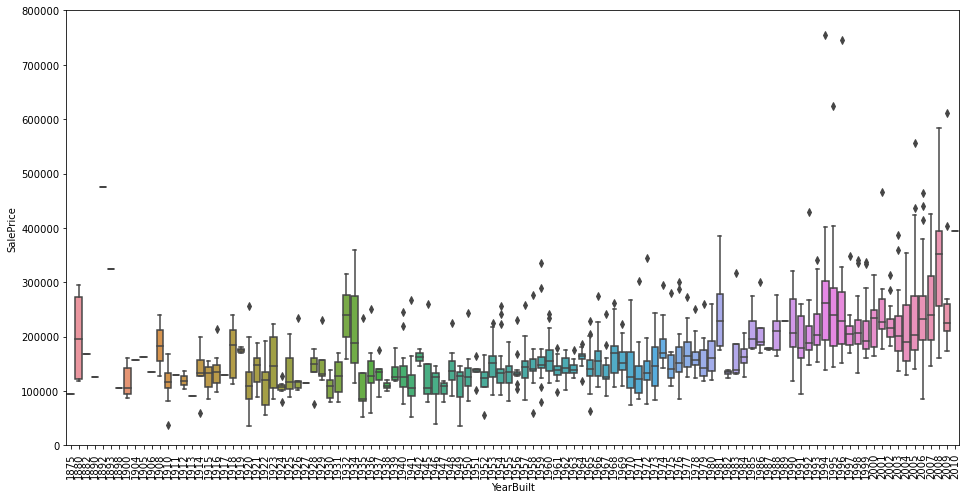

In [33]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

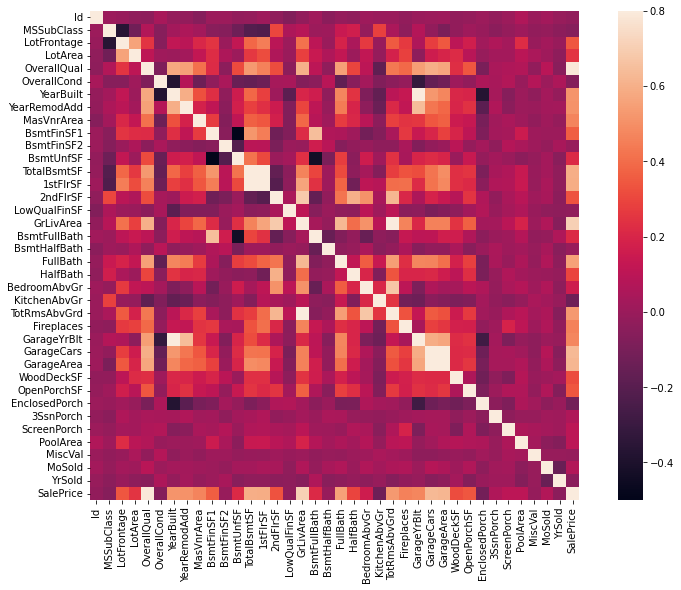

In [34]:
#using heatmap
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

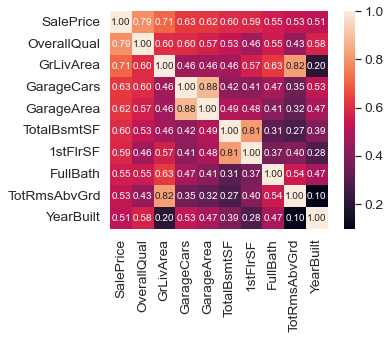

In [35]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
def check_null_status(df_train, df_test):
    null_data = pd.DataFrame({'train_null_data %':[None],'test_null_data %':[None]}, index=df_test.columns)
    for col in df_test.columns:
        null_data.loc[col] = (round(sum(df_train[col].isna())/df_train.shape[0],2)*100,round(sum(df_test[col].isna())/df_test.shape[0],2)*100)
    return null_data
check_null_status(df_train, df_test)

train_null_data % test_null_data %
Id                          0.0              0.0
MSSubClass                  0.0              0.0
MSZoning                    0.0              0.0
LotFrontage                18.0             15.0
LotArea                     0.0              0.0
...                         ...              ...
MiscVal                     0.0              0.0
MoSold                      0.0              0.0
YrSold                      0.0              0.0
SaleType                    0.0              0.0
SaleCondition               0.0              0.0

[80 rows x 2 columns]

In [37]:
#dropping unwanted coljumns 
df_train.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)
df_test.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)

In [38]:
#checking columns

df_train.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
df_test.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
check_null_status(df_train, df_test)

train_null_data % test_null_data %
MSSubClass                  0.0              0.0
MSZoning                    0.0              0.0
LotFrontage                18.0             15.0
LotArea                     0.0              0.0
Street                      0.0              0.0
...                         ...              ...
MiscVal                     0.0              0.0
MoSold                      0.0              0.0
YrSold                      0.0              0.0
SaleType                    0.0              0.0
SaleCondition               0.0              0.0

[75 rows x 2 columns]

In [41]:
cat_col = df_test.select_dtypes(include='O').columns
print(len(cat_col))
for col in df_test.select_dtypes(exclude=['O']).columns:
    df_test.fillna(df_test[col].median(), inplace=True)
    df_train.fillna(df_train[col].median(), inplace=True) 

for col in cat_col:
    df_test.fillna(df_test[col].mode(), inplace=True)
    df_train.fillna(df_train[col].mode(), inplace=True)

39


In [42]:
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
def detect_outlier(data):
    outlier=[]
    q1 = np.percentile(data , 1)
    q3 = np.percentile(data , 99)
    for i in data:
        if i > q3 or i < q1:
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier

In [44]:
out_train = df_train.copy()
out_test = df_test.copy()

In [45]:
def plot_vars(data, features, target):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        data['Outlier'] = detect_outlier(data[col])
        sns.scatterplot(data=data, x=col, y=target, ax=axis[i, 0], hue='Outlier')
        sns.kdeplot(data=data, x=col, ax=axis[i, 1], hue='Outlier')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; ski

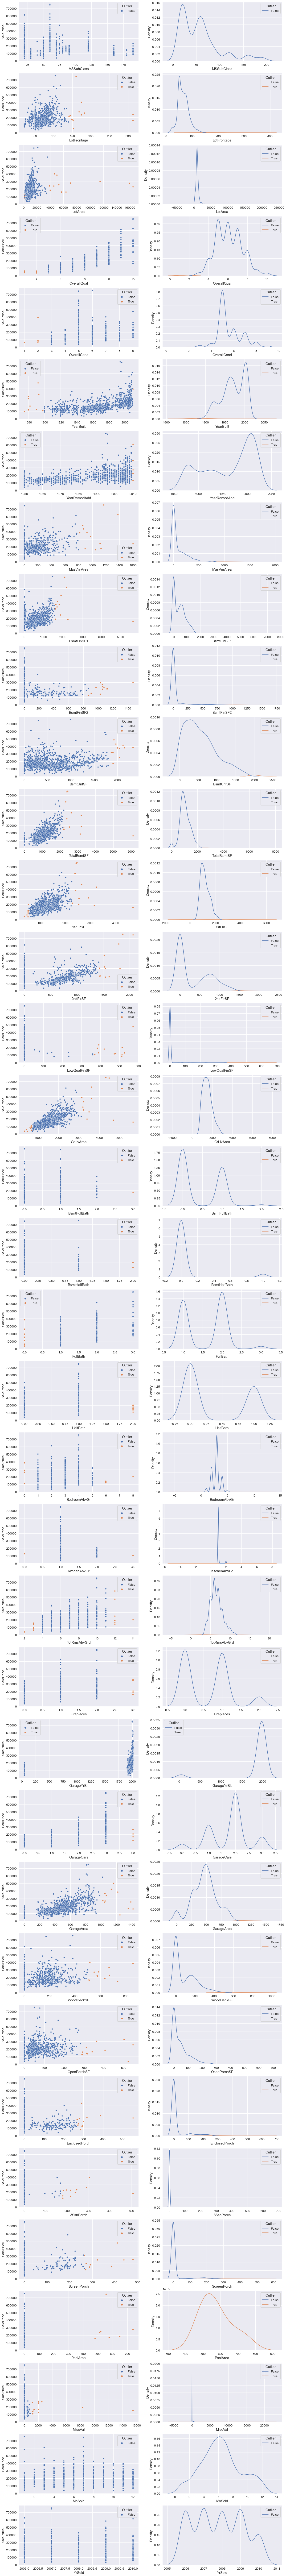

In [46]:
colmns = out_train.select_dtypes(exclude=['O']).columns
plot_vars(out_train, colmns[:-1], colmns[-1])

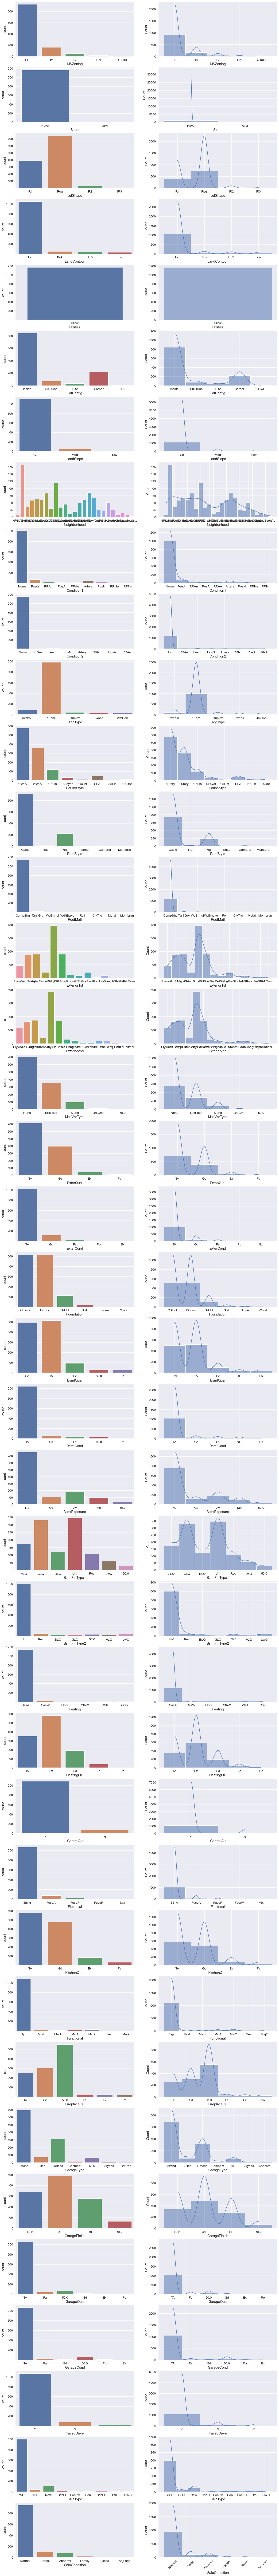

In [47]:
cat_colmns = df_train.select_dtypes(include='O').columns

def cate_plot(data, features):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        sns.countplot(data=data, x=col, ax=axis[i, 0])
        plt.xticks(rotation=45)
        sns.histplot(data=data, x=col, ax=axis[i, 1], kde=True)
        plt.xticks(rotation=45)
        
cate_plot(out_train[cat_colmns].astype(str), cat_colmns)

In [48]:
colmns = out_test.select_dtypes(exclude=['O']).columns

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; ski

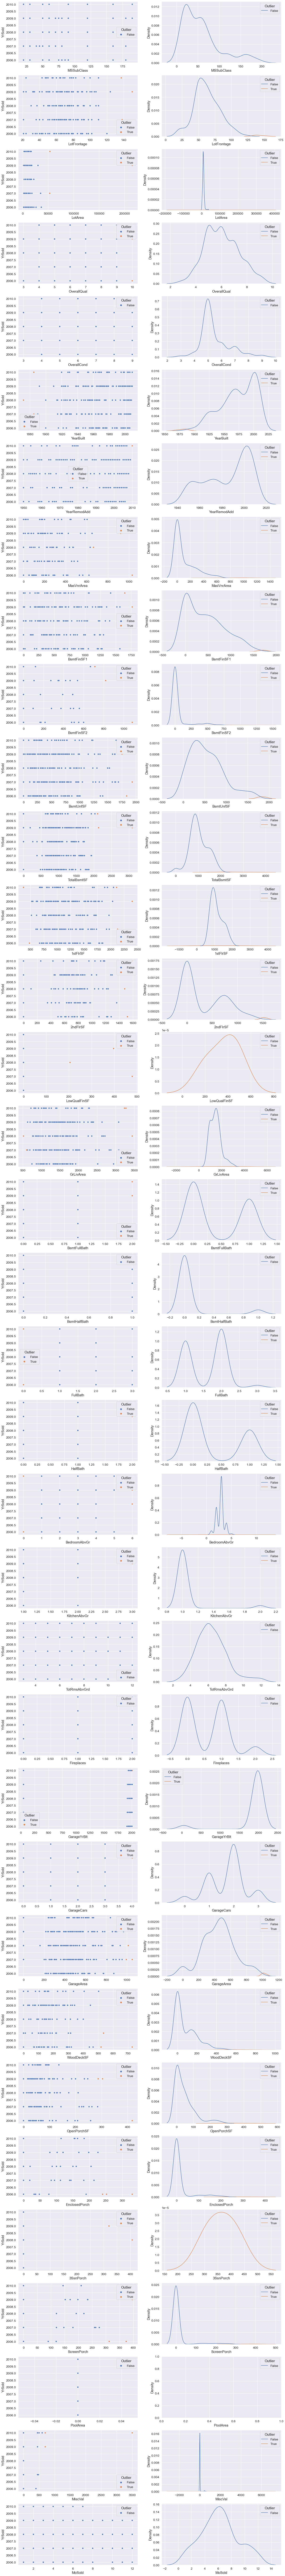

In [49]:
plot_vars(out_test, colmns[:-1], colmns[-1])

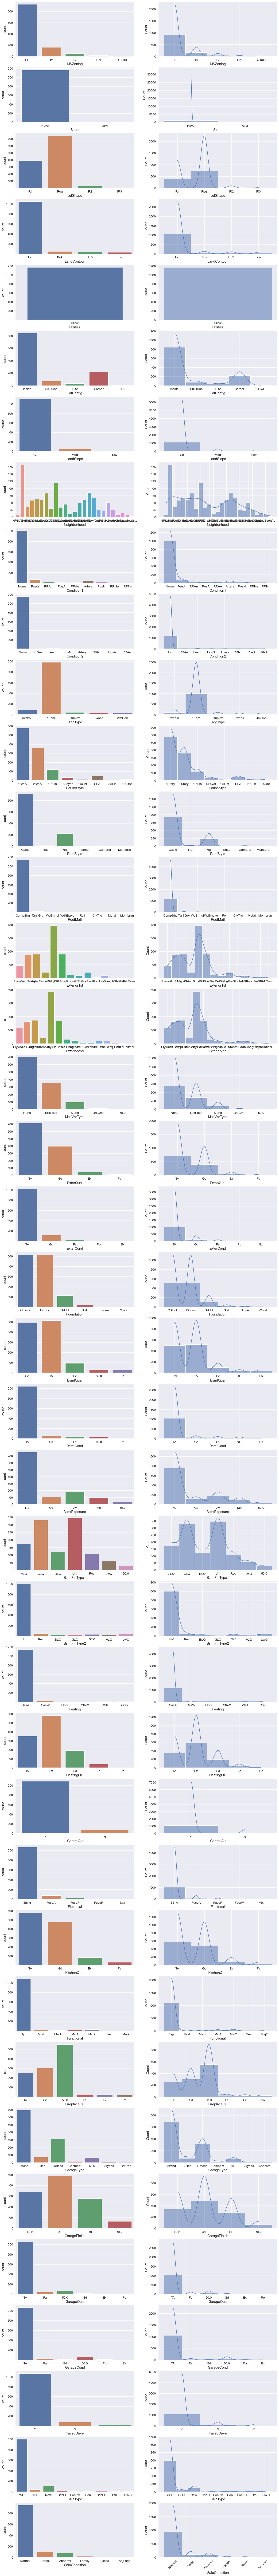

In [50]:
cat_colmns = out_test.select_dtypes(include=['O']).columns
cate_plot(out_train[cat_colmns].astype(str), cat_colmns)

In [51]:
#importing libraries
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

In [52]:
trn_data = df_train.copy()
tst_data = df_test.copy()

In [53]:
for col in trn_data.select_dtypes(include=['O']).columns:
    trn_data[col] = lblencoder.fit_transform(trn_data[col].astype(str))
    tst_data[col] = lblencoder.fit_transform(tst_data[col].astype(str))

In [54]:
targets = trn_data['SalePrice']
trn_data.drop(['SalePrice'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mnmx = MinMaxScaler()
stdnorm = StandardScaler()

In [55]:
def standardized_normalized(data):
    df_col = data.columns
    data = mnmx.fit_transform(data)
    data = stdnorm.fit_transform(data)
    return pd.DataFrame(data, columns=df_col)

In [56]:
#checking no of rows and columns

trn_data.shape

(1168, 75)

In [57]:
trn_data = standardized_normalized(trn_data)
tst_data = standardized_normalized(tst_data)

In [58]:
#random data
trn_data.sample(10)

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
882   -0.877042 -0.021646    -0.299472 -0.433875  0.058621  0.752055   
405   -0.877042 -0.021646    -0.089845 -0.227255  0.058621  0.752055   
146   -0.877042 -0.021646     0.539035 -0.098815  0.058621  0.752055   
285   -0.638508 -0.021646    -0.718726  0.207430  0.058621 -1.373107   
537    2.939506  1.558511    -1.934561 -0.999793  0.058621  0.752055   
325    0.315629 -0.021646    -0.299472  0.103785  0.058621 -1.373107   
56    -0.877042 -0.021646    -0.718726  1.051560  0.058621  0.752055   
963   -0.877042 -0.021646    -0.299472 -0.256293  0.058621  0.752055   
641   -0.161440  1.558511    -0.718726 -0.500887  0.058621  0.752055   
714    0.554163 -0.021646     0.119782  0.268188  0.058621 -1.373107   

     LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
882     0.318473        0.0   0.606420  -0.226126  ...    -0.701705   
405     0.318473        0.0   0.606420  -0.226126  ...    -0.113936   
146     0.318473        0.0  -0.611634  -0.226126  ...    -0.701705   
285     0.318473        0.0   0.606420  -0.226126  ...    -0.701705   
537     0.318473        0.0   0.606420  -0.226126  ...    -0.701705   
325     0.318473        0.0  -1.829688  -0.226126  ...     1.332880   
56      0.318473        0.0   0.606420  -0.226126  ...    -0.701705   
963     0.318473        0.0   0.606420  -0.226126  ...    -0.159149   
641     0.318473        0.0   0.606420  -0.226126  ...    -0.701705   
714     0.318473        0.0   0.606420  -0.226126  ...    -0.701705   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
882      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  1.361470   
405      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  1.361470   
146      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131 -0.500587   
285      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131 -1.245410   
537      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  0.616647   
325      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  1.361470   
56       -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  0.244236   
963      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  1.361470   
641      -0.364375  -0.125172    -0.273377 -0.076845 -0.087131  0.244236   
714      -0.364375  -0.125172     1.542915 -0.076845 -0.087131  1.361470   

       YrSold  SaleType  SaleCondition  
882  0.146863  0.330033       0.207932  
405 -0.605487  0.330033       0.207932  
146 -0.605487  0.330033       0.207932  
285  0.899213  0.330033       0.207932  
537 -1.357837  0.330033      -3.390060  
325  0.899213  0.330033       0.207932  
56   1.651563  0.330033       0.207932  
963 -0.605487  0.330033       0.207932  
641  0.899213  0.330033       0.207932  
714  0.899213  0.330033       0.207932  

[10 rows x 75 columns]

In [59]:
tst_data.sample(10)

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
49    -0.856054 -0.287006     1.062549  0.198444  0.083045 -1.402669   
157   -0.169644 -0.287006     3.561967  0.554926  0.083045 -1.402669   
105    0.745570 -0.287006     0.005103 -0.275488  0.083045  0.745474   
258   -0.856054 -0.287006     1.014483  0.094295  0.083045  0.745474   
130   -0.856054 -0.287006    -0.667817 -0.180281  0.083045 -1.402669   
48     1.431981 -0.287006    -1.436869 -0.424122  0.083045 -1.402669   
77     1.431981 -0.287006    -1.004278 -0.560809  0.083045  0.745474   
72    -0.169644 -0.287006     0.005103  0.180935  0.083045  0.745474   
40    -0.856054  1.808136    -0.667817 -0.349054  0.083045  0.745474   
31    -0.856054 -0.287006     0.149300 -0.042242  0.083045  0.745474   

     LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
49      0.299297  -0.058621   0.598774  -0.226274  ...     0.257608   
157    -3.998799  -0.058621   0.598774  -0.226274  ...    -0.715738   
105     0.299297  -0.058621   0.598774  -0.226274  ...     0.135939   
258     0.299297  -0.058621   0.598774  -0.226274  ...    -0.715738   
130     0.299297  -0.058621   0.598774  -0.226274  ...     0.653029   
48      0.299297  -0.058621   0.598774  -0.226274  ...     0.227190   
77      0.299297  -0.058621   0.598774  -0.226274  ...    -0.411568   
72     -3.998799  -0.058621   0.598774  -0.226274  ...    -0.715738   
40      0.299297  -0.058621   0.598774  -0.226274  ...    -0.715738   
31      0.299297  -0.058621   0.598774  -0.226274  ...    -0.092189   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
49       -0.341845  -0.082453    -0.258624       0.0 -0.126021 -1.528224   
157      -0.341845  -0.082453    -0.258624       0.0 -0.126021 -1.167187   
105      -0.341845  -0.082453    -0.258624       0.0  2.556715 -0.084077   
258      -0.341845  -0.082453    -0.258624       0.0 -0.126021 -0.806151   
130      -0.341845  -0.082453    -0.258624       0.0 -0.126021 -0.445114   
48       -0.341845  -0.082453    -0.258624       0.0 -0.126021  0.276960   
77       -0.341845  -0.082453     2.207837       0.0 -0.126021 -0.806151   
72       -0.341845  -0.082453     3.509580       0.0 -0.126021 -0.084077   
40       -0.341845  -0.082453    -0.258624       0.0 -0.126021 -0.806151   
31       -0.341845  -0.082453    -0.258624       0.0 -0.126021  0.637997   

       YrSold  SaleType  SaleCondition  
49   0.863555   0.23029       0.148654  
157 -0.650908   0.23029       0.148654  
105  1.620787   0.23029       0.148654  
258  0.863555   0.23029      -1.587627  
130  1.620787   0.23029       0.148654  
48   0.863555   0.23029       0.148654  
77   1.620787   0.23029       0.148654  
72   0.106324   0.23029       0.148654  
40   0.106324   0.23029       1.884936  
31   0.863555   0.23029       0.148654  

[10 rows x 75 columns]

In [60]:
#importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

In [61]:
ml_algo = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    XGBRegressor(),
    KNeighborsRegressor()
]

In [62]:
ml_columns = ['MLAlgo Name', 'MLAlgo Parameters','MLAlgo Train MAE', 'MLAlgo Test MAE','MLAlgo Time']
ml_algo_compare = pd.DataFrame(columns = ml_columns)


ml_algo_predict = pd.DataFrame(targets.copy().values, columns=['Actual Sales'])

In [63]:
row_index=0
for alg in ml_algo:
    #set name and parameters
    MLA_name = alg.__class__.__name__
    ml_algo_compare.loc[row_index, 'MLAlgo Name'] = MLA_name
    ml_algo_compare.loc[row_index, 'MLAlgo Parameters'] = str(alg.get_params())
    cv_results = cross_validate(alg, trn_data, targets, scoring= 'neg_mean_absolute_error',cv = 3, return_train_score=True)
    ml_algo_compare.loc[row_index, 'MLAlgo Time'] = cv_results['fit_time'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Train MAE'] = cv_results['train_score'].mean()
    ml_algo_compare.loc[row_index, 'MLAlgo Test MAE'] = cv_results['test_score'].mean()
    alg.fit(trn_data, targets)
    ml_algo_predict[MLA_name] = alg.predict(trn_data)
    row_index += 1

In [64]:
ml_algo_compare

MLAlgo Name                                  MLAlgo Parameters  \
0       LinearRegression  {'copy_X': True, 'fit_intercept': True, 'n_job...   
1  DecisionTreeRegressor  {'ccp_alpha': 0.0, 'criterion': 'squared_error...   
2  RandomForestRegressor  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...   
3                    SVR  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...   
4           XGBRegressor  {'objective': 'reg:squarederror', 'base_score'...   
5    KNeighborsRegressor  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   

  MLAlgo Train MAE MLAlgo Test MAE MLAlgo Time  
0    -19175.639939   -22045.129933    0.023681  
1              0.0   -27593.152209    0.028692  
2     -7080.238638    -18335.43892     1.27834  
3    -55247.248512    -55411.59805    0.049463  
4      -274.936169   -19114.910603    0.463446  
5    -19727.986239   -23995.269408    0.003528

In [65]:
ml_algo_predict.sample(10)

Actual Sales  LinearRegression  DecisionTreeRegressor  \
733         176000     176647.061370               176000.0   
888         135000     218633.297238               135000.0   
748         158000     149981.049793               158000.0   
591         235000     190395.704190               235000.0   
114         259500     219516.042029               259500.0   
104         335000     359106.857385               335000.0   
738         140000     147333.929233               140000.0   
828         110000     112604.416199               110000.0   
1067         84000      70307.593833                84000.0   
838          83000      73468.810134                83000.0   

      RandomForestRegressor            SVR   XGBRegressor  KNeighborsRegressor  
733               173337.87  164005.315654  172649.109375             185500.0  
888               154525.09  163964.001683  135550.250000             225220.0  
748               149055.40  163933.181064  157622.062500             146900.0  
591               208242.82  163940.592601  234769.531250             173740.0  
114               226402.90  163972.675797  259356.359375             213440.0  
104               340643.90  164042.949054  335593.468750             355000.0  
738               144173.00  163922.961466  140745.250000             144500.0  
828               111776.18  163910.145398  110350.445312             122080.0  
1067               84974.43  163932.983790   83830.171875              95700.0  
838                89079.13  163909.620231   83512.429688             117800.0

In [66]:
dtmodel = XGBRegressor()
dtmodel.fit(trn_data, targets)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score
trn_p = dtmodel.predict(trn_data)
tst_ = dtmodel.predict(tst_data)

In [68]:
print("training mae:", mean_absolute_error(targets,trn_p))
print("training r2:", r2_score(targets,trn_p))

training mae: 695.7653306934932
training r2: 0.9998312585722334
